# Distribution $\chi_{k}^{2}$

### Exercise

Consider 20 random variables that follow a standard normal distribution $(X_1,..., X_{20})$ and make the change of variables $Y_i = X_{i}^2$. Determine which probability density function the new variables follow $Y_i$.  Create a new random variable $Z = \sum_{i=1}^{20} Y_i$. Then simulate the 20 variables $X_i$ and calculate the corresponding value $Z$. Repeat this process $10.000$ times and make a frequency histogram of $Z$. Compare the histogram with a chi-square and a normal distribution with appropriate parameters.

### Solution

Let $X_{i} \sim N(0,1)$ with $i = 1, 2,...,20$

When making the change of variable $Y_{i} = X_{i}^2$

The probability density function of the variables $Y_{i}$ is obtained from:

$$g(y) = 2\, f(x) \bigg{|} \frac{\mathrm{d}x}{\mathrm{d}y}\bigg{|}$$

$$g(y) = \frac{1}{\sqrt{2\pi y}} \exp{\left(-\frac{y}{2}\right)},$$ 

which is the chi-square probability density function of one degree of freedom. So, this is written as:

$$Y_{i} \sim \chi_{1}^2.$$

The corresponding moments are:

$\mathrm{E}[Y] = 1$

$\mathrm{Var}[Y] = 2$

We now define the new random variable $Z$ given by:

$$Z = \sum_{i=1}^{20}Y_{i}$$

where $Z \sim \chi_{20}^{2}$, that is, it follows a chi-square distribution of 20 degrees of freedom. The moments of the random variable $Z$ are:

$\mathrm{E}[Z] = 20\times1 = 20$

$\mathrm{Var}[Z] = 20\times2 = 40$

In this notebook we make a histogram of frequencies of $Z$ and another of density of the same random variable, and we compare it with a chi-square distribution of 20 degrees of freedom. In addition, we compare with a normal distribution of mean $\mu$ and standard deviation $\sigma$. The values of $\mu$ and $\sigma$ are those that correspond to the central limit theorem:

$$\chi_{k}^{2} \rightarrow N(\mu = k, \sigma = \sqrt{2k})\qquad \mathrm{para}\,k \gg 1$$

So $\mu = 20$, and $\sigma = \sqrt{40}$.

In [1]:
%matplotlib inline

In [2]:
# Getting libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# Seed to reproduce results

num_seed = 42
rng = np.random.default_rng(num_seed)

In [3]:
# 10000 simulations
# In each one we add 20 random variables X that follow a standard normal distribution.
# We also calculate Y = X^2 for each simulated value of the random variable X, and add the values of Y

Nsim = 10000
Nvar = 20
x = rng.normal(size=(Nsim, Nvar))
y = np.power(x, 2)
data = [y[i].sum() for i in range(len(y))]

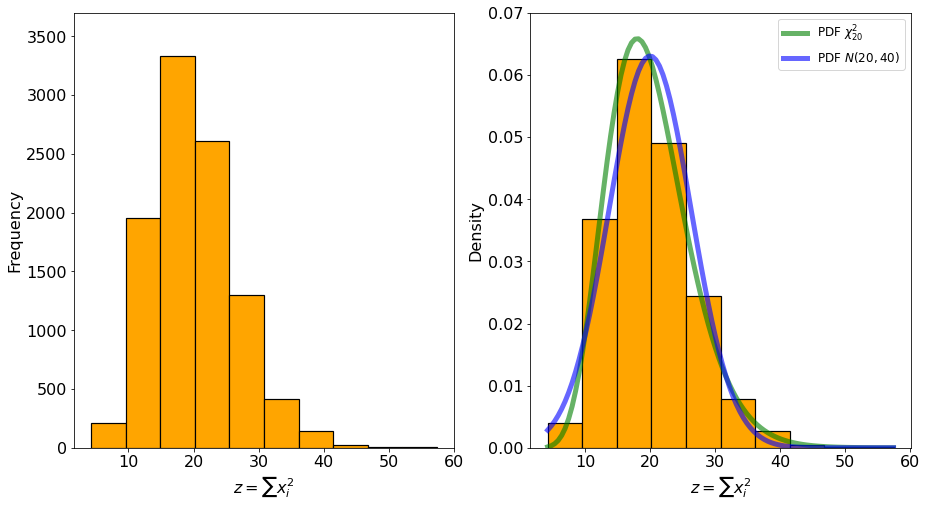

In [4]:
# We perform frequency and density histograms to compare the simulated values with a distribution
# chi-square of 20 degrees of freedom and a normal PDF of mean 20 and variance 40

plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.hist(data, bins=10, color='orange', edgecolor='black', linewidth=1.2)
plt.ylim(bottom=0, top=3700)
plt.xlabel('$z = \sum x_{i}^2$', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(data, bins=10, color='orange', density=True, edgecolor='black', linewidth=1.2)
plt.ylim(bottom=0, top=0.07)
plt.xlabel('$z = \sum x_{i}^2$', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

x = np.linspace(np.min(data), np.max(data),100)
plt.plot(x, chi2(Nvar).pdf(x), ls ='-', color='green', lw=5, alpha=0.6, label='PDF $\chi_{20}^2$')
plt.plot(x, norm(Nvar, np.sqrt(2*Nvar)).pdf(x), ls = '-', color='blue', lw=5, alpha=0.6, label='PDF $N(20,40)$')
plt.legend(fontsize=12, loc=1)

plt.show()

We see above that there is a good agreement with a normal distribution, as indicated by the central limit theorem.